In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Ecommerce.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.isnull().sum()#the dataset is clean

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
df.duplicated().sum()#no duplicated data

0

In [5]:
#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


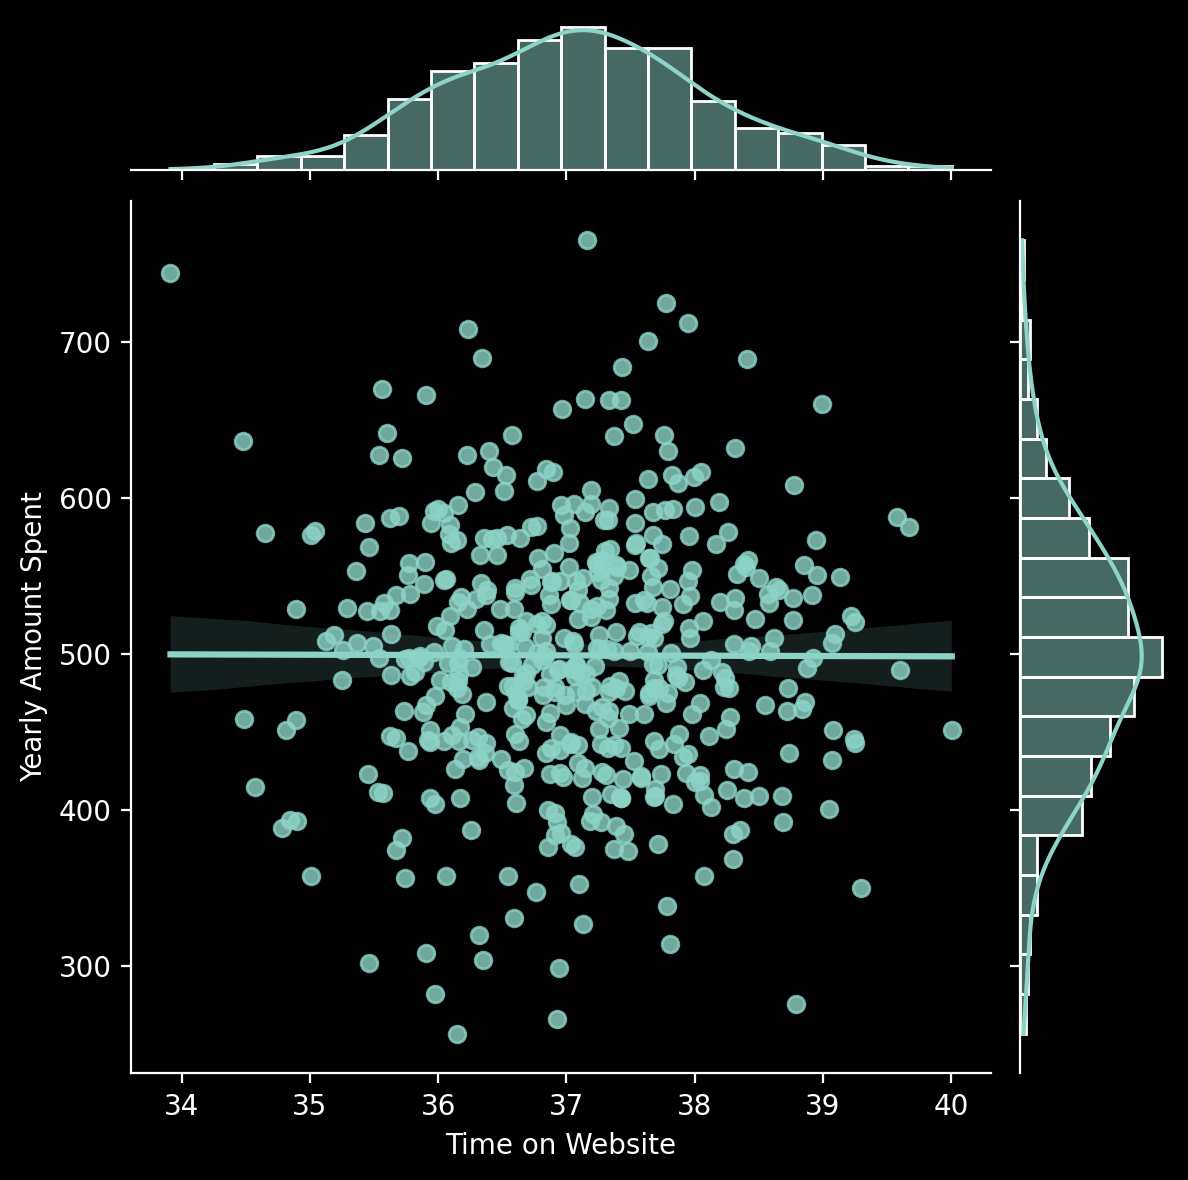

In [8]:
 sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent',kind='reg');

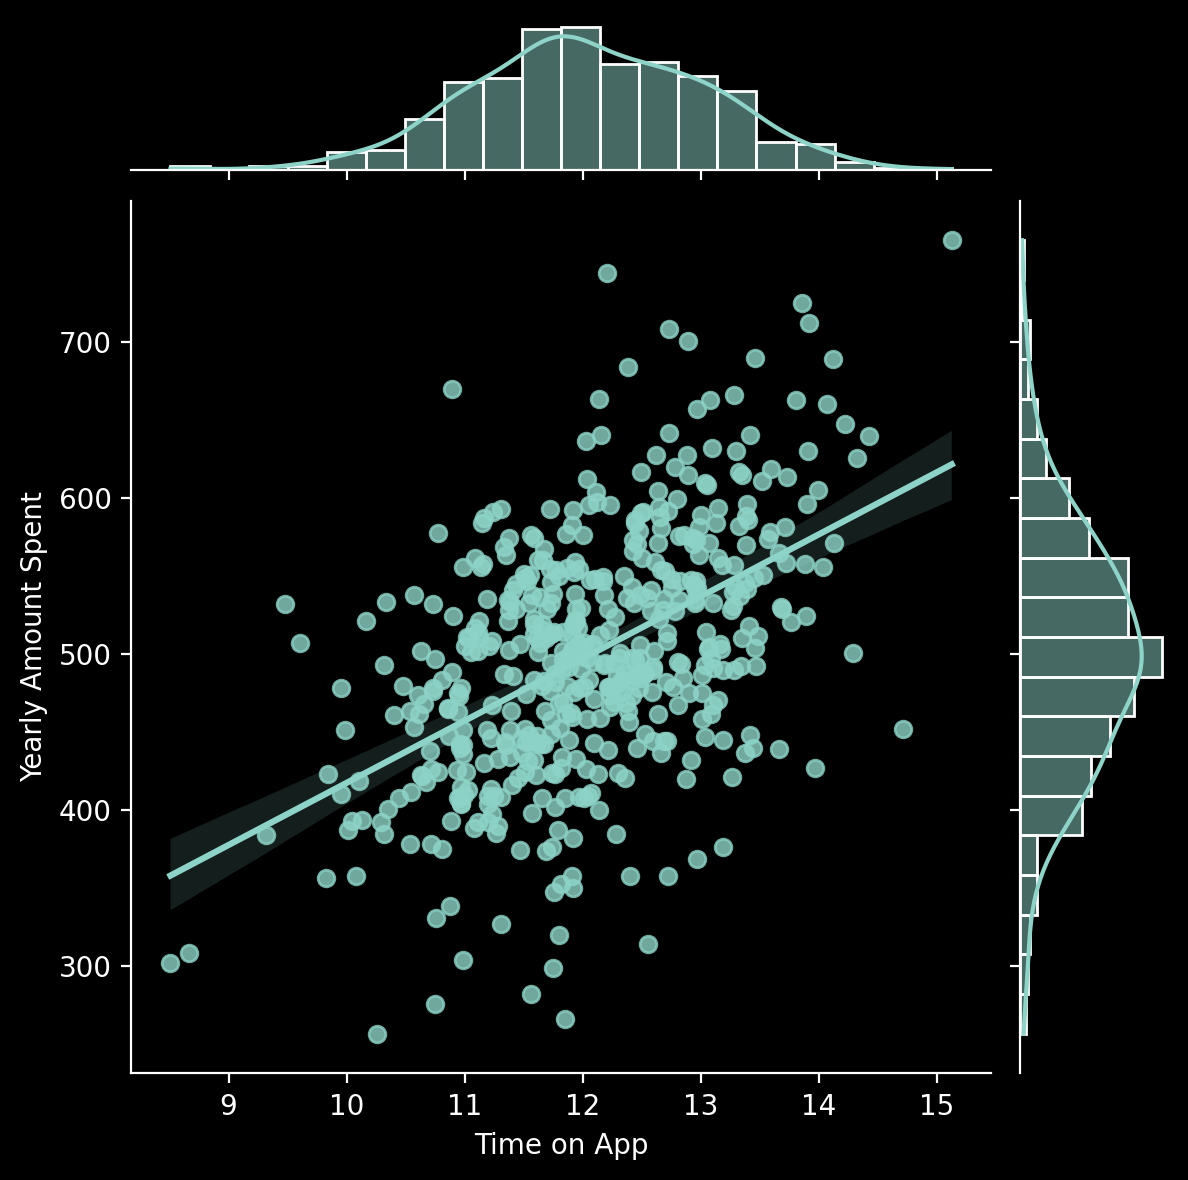

In [9]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',kind='reg');

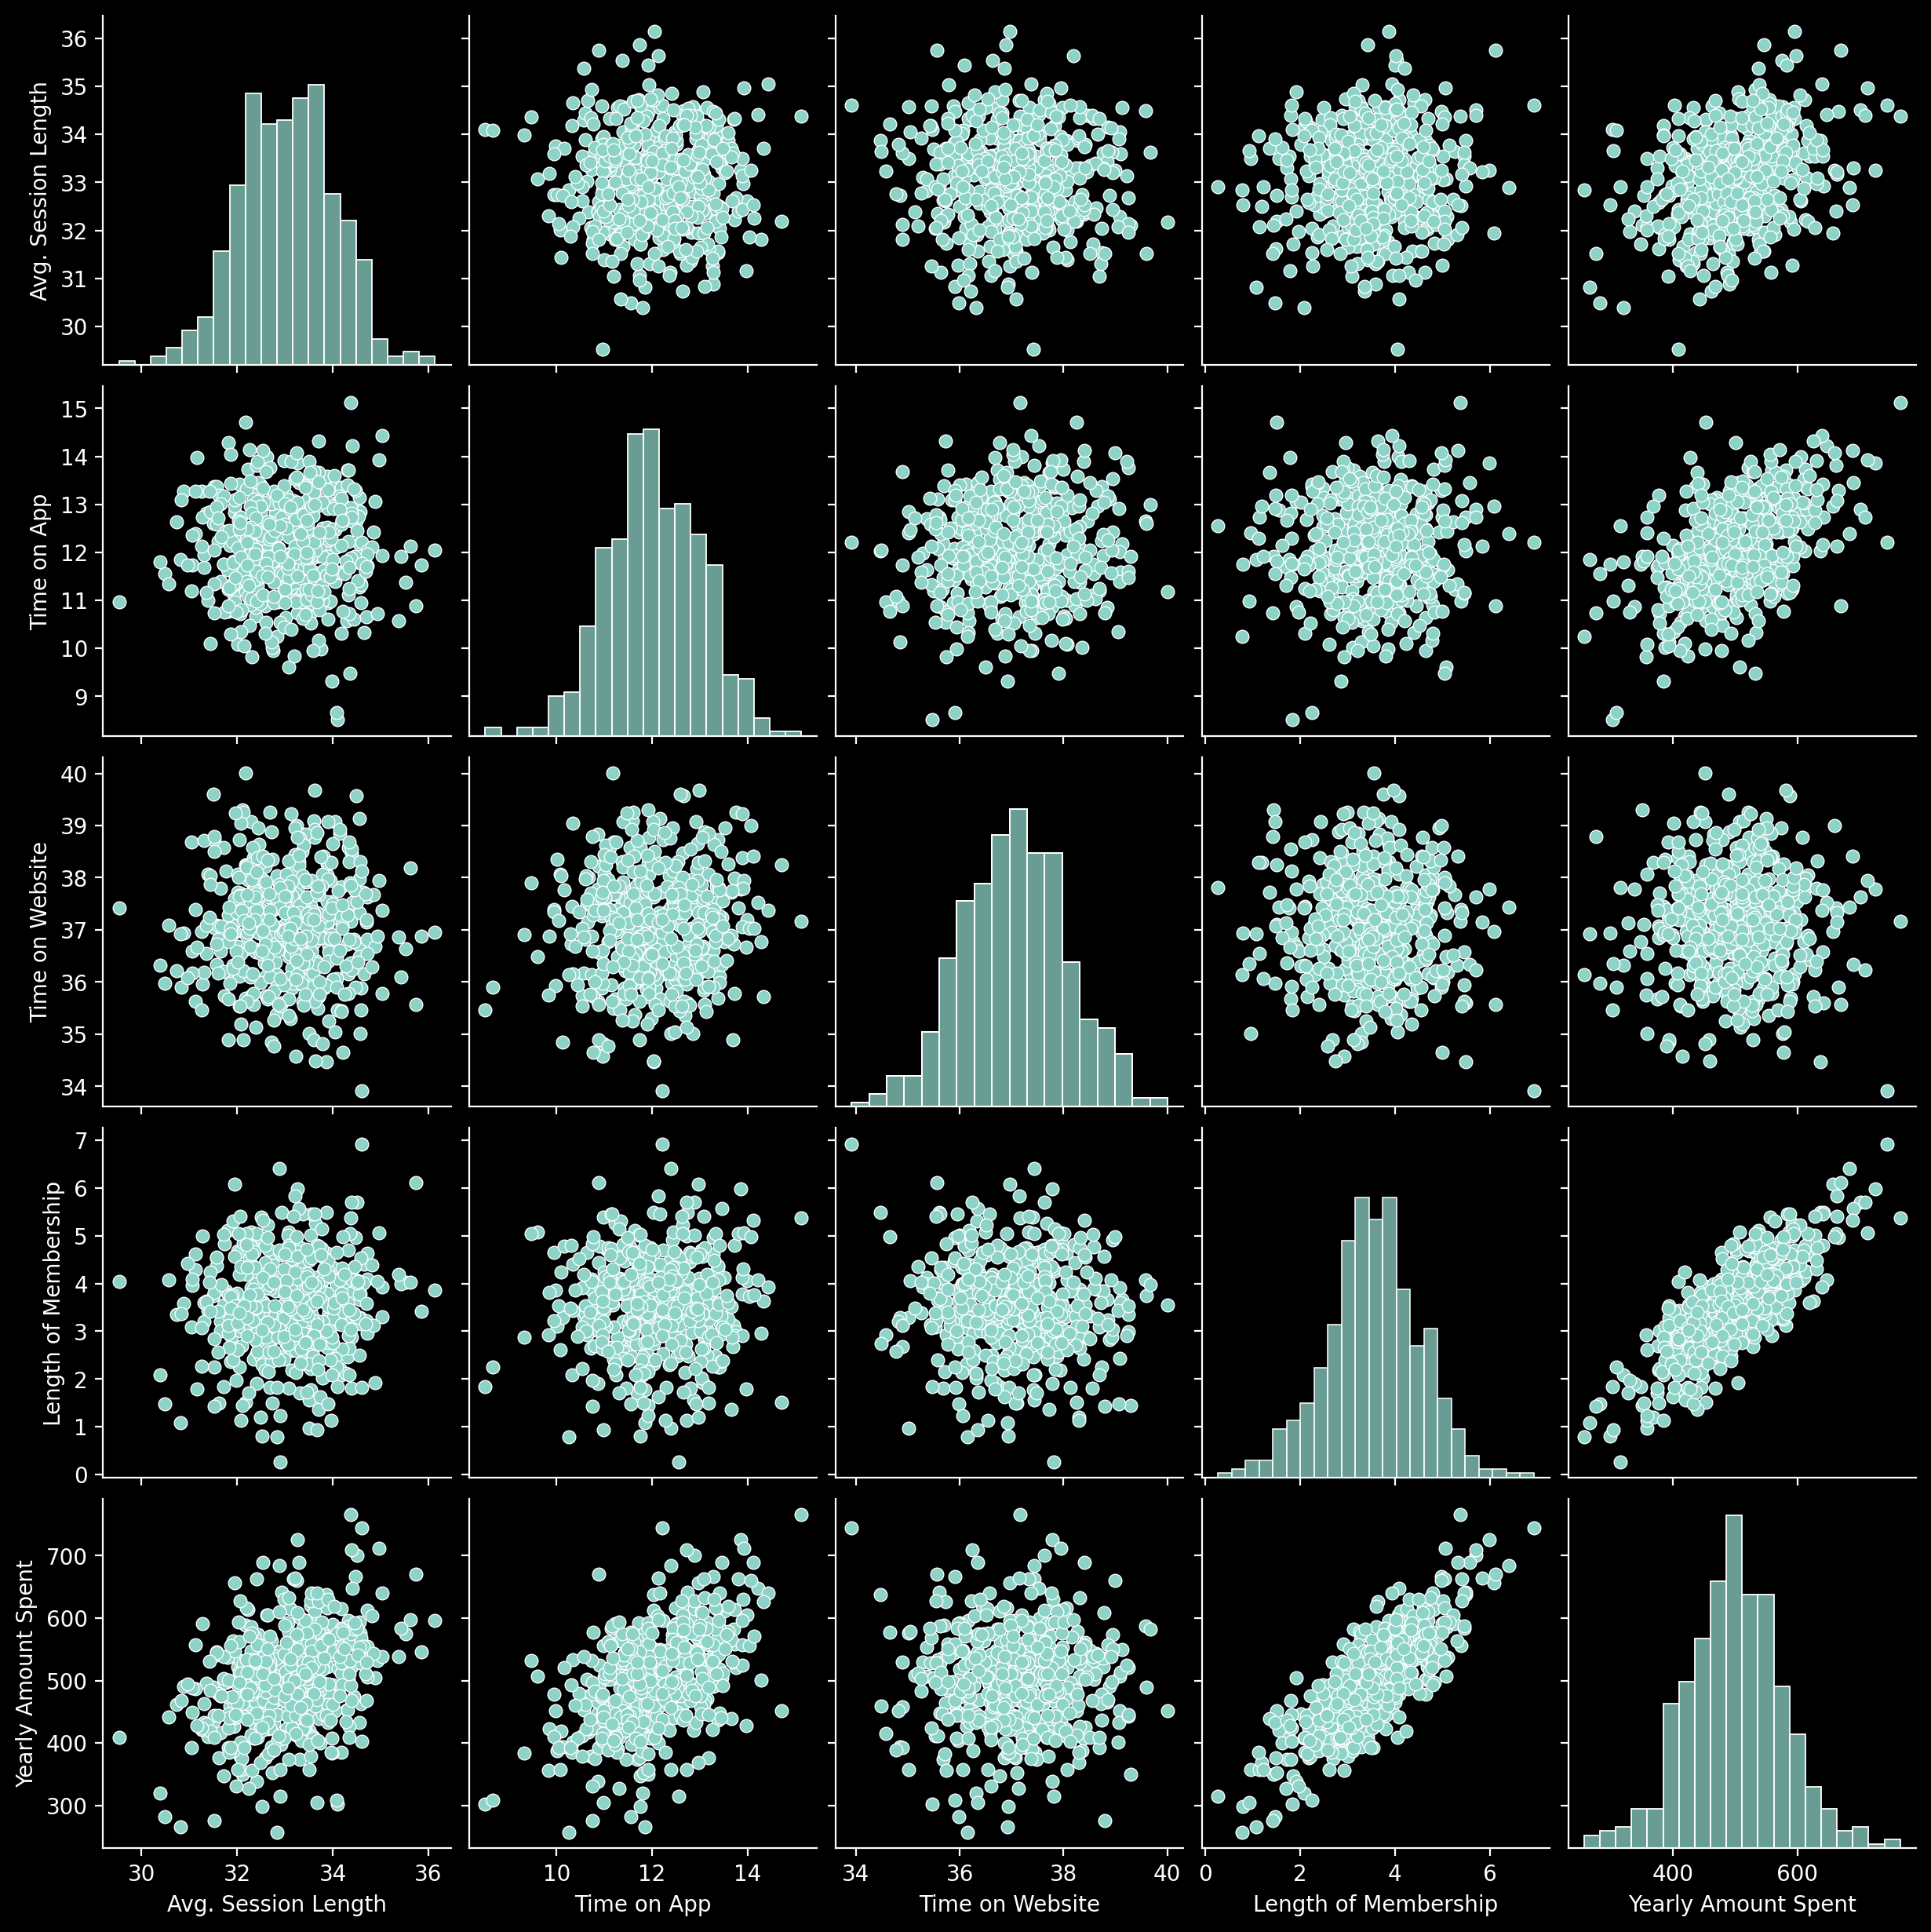

In [10]:
sns.pairplot(data=df);

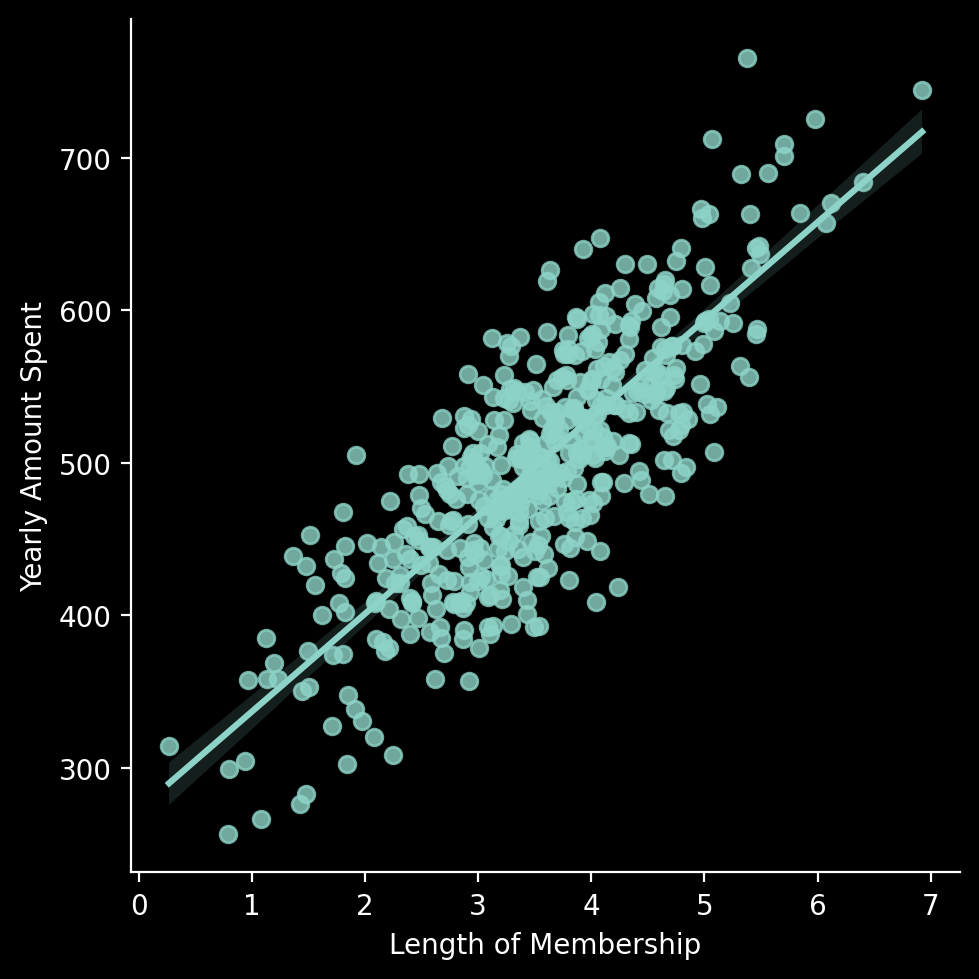

In [11]:
sns.lmplot(data=df,x='Length of Membership',y='Yearly Amount Spent');

<ipython-input-12-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


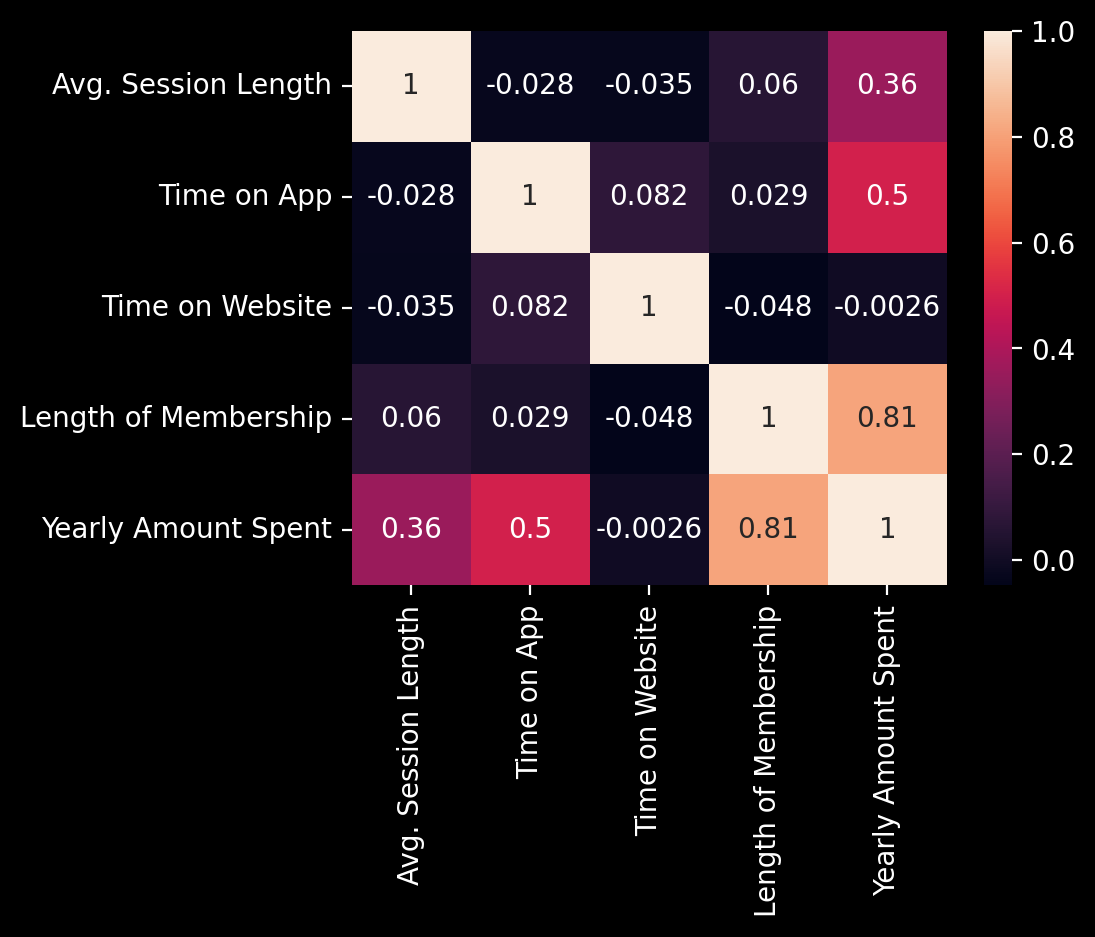

In [12]:
sns.heatmap(df.corr(),annot=True);

In [13]:
#Training and testing

In [14]:
x = df.drop(['Yearly Amount Spent','Email','Address','Avatar'],axis=1);
y = df['Yearly Amount Spent']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [16]:
x_train.shape

(350, 4)

In [17]:
x_test.shape

(150, 4)

In [18]:
y_train.shape

(350,)

In [19]:
y_test.shape

(150,)

In [20]:
lm = LinearRegression()
lm

LinearRegression()

In [21]:
lm.fit(x_train,y_train)

LinearRegression()

In [22]:
lm.score(x_test,y_test)

0.9840128639083672

In [23]:
lm.coef_

array([25.55842016, 38.97790189,  0.10584078, 61.05422376])

In [24]:
lm.intercept_

-1034.7648480773335

In [25]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.558420
Time on App,38.977902
Time on Website,0.105841
Length of Membership,61.054224


In [26]:
#predictions

In [27]:
predictions = lm.predict(x_test)
predictions = pd.DataFrame(predictions,columns=['predictions'])
predictions

,predictions
0,509.173229
1,551.480397
2,530.088749
3,500.781179
4,474.448410
...,...
145,647.689623
146,431.086713
147,531.944933
148,622.877810


In [28]:
predictions['Actual'] = np.array(y_test)
predictions

,predictions,Actual
0,509.173229,514.088958
1,551.480397,546.556667
2,530.088749,537.773163
3,500.781179,499.140152
4,474.448410,476.139247
...,...,...
145,647.689623,663.803693
146,431.086713,447.369027
147,531.944933,535.321610
148,622.877810,614.715334


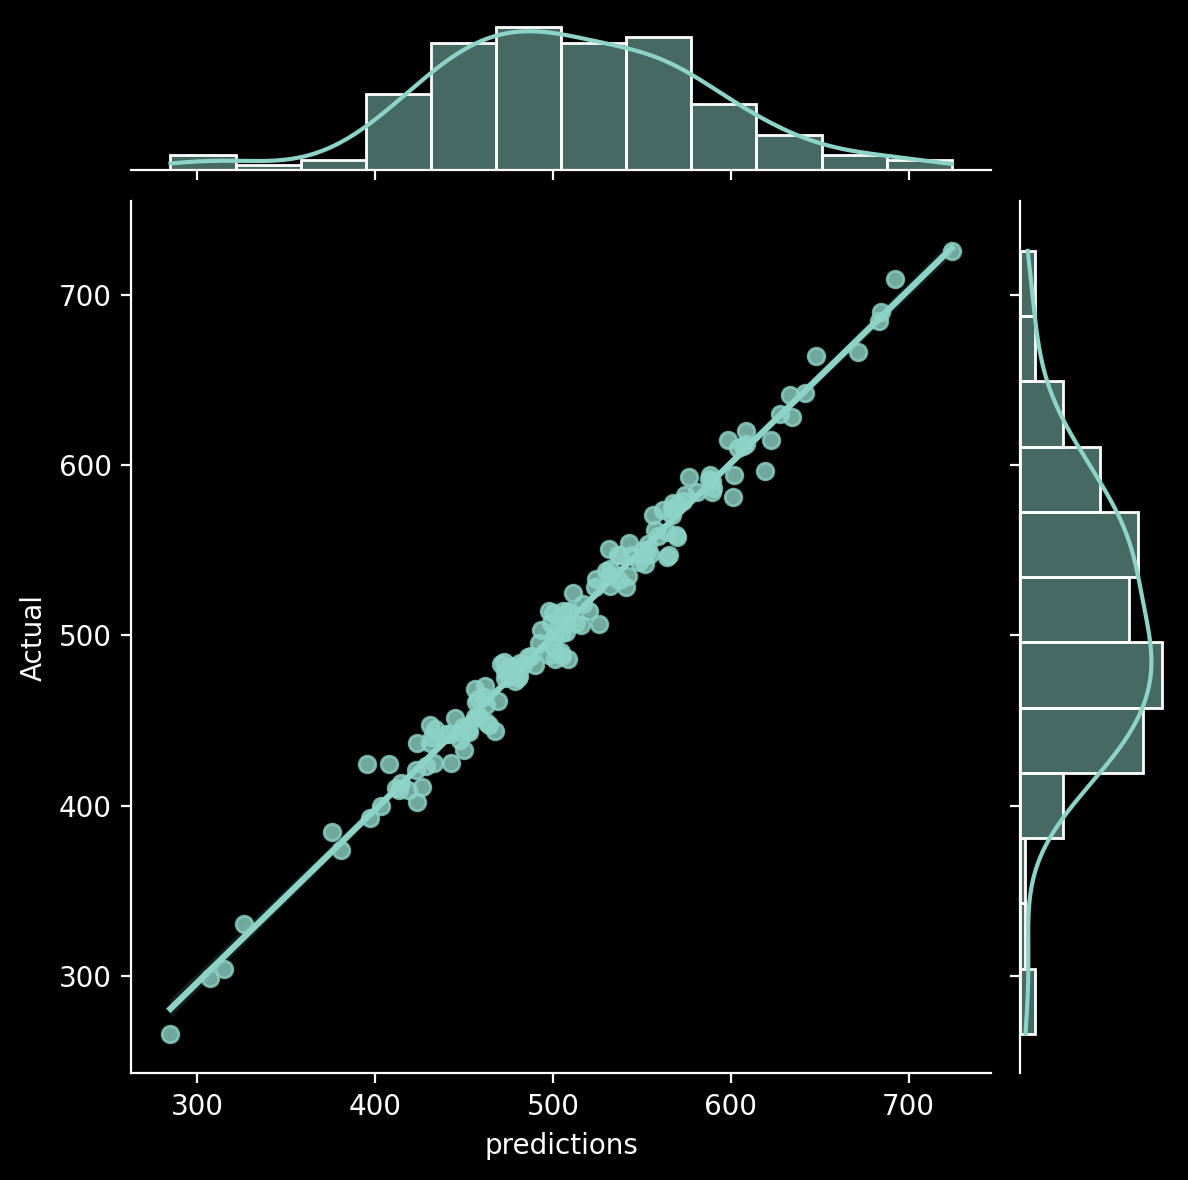

In [29]:
sns.jointplot(data=predictions,x='predictions',y='Actual',kind='reg');

In [31]:
metrics.mean_absolute_error(y_test,predictions['predictions'])#MAE

8.0272188659995

In [36]:
np.sqrt(metrics.mean_squared_error(y_test,predictions['predictions']))#RMSE

9.925973005746823

In [37]:
metrics.r2_score(y_test,predictions['predictions'])#R^2

0.9840128639083672

<ipython-input-42-ba4c972aa7dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions['predictions']));


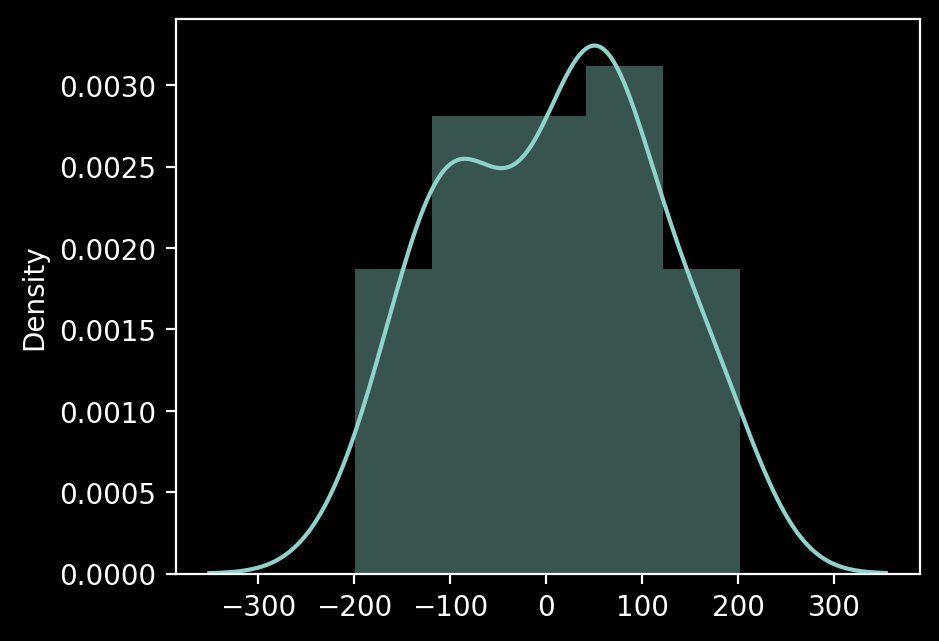

In [42]:
sns.distplot((y_test-predictions['predictions']));